In [29]:
# https://bastings.github.io/annotated_encoder_decoder/
import os
import numpy as np
import pandas as pd
import pickle
from functools import reduce
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append(os.path.join(os.getcwd(),os.pardir))

from recipe_gen.seq2seq_utils import Vocabulary, FOLDER_PATH,DATA_FILES

In [89]:
with open(os.path.join(FOLDER_PATH,DATA_FILES[3]),'rb') as f:
    vocab_ingrs=pickle.load(f)

with open(os.path.join(FOLDER_PATH,DATA_FILES[4]),'rb') as f:
    vocab_toks=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[0]),'rb') as f:
    ingrs_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[1]),'rb') as f:
    tokens_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[5]),'rb') as f:
    recipes=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[2]),'rb') as f:
    recipes_test=pickle.load(f)

In [90]:
len(recipes_test)

57570

In [75]:
recipes_pd=pd.DataFrame(recipes).T
recipes_pd = recipes_pd.reset_index()
recipes_pd

,index,ingredients,instructions,title,tokenized
0,000033e39b,"[(elbow_macaroni, (None, None, None, None), Fa...",[cook macaroni according to package directions...,"[dilly, macaroni, salad, recipe]","[[cook, macaroni, according, to, package, dire..."
1,000035f7ed,"[(tomato, (None, None, None, None), True), (ko...",[add the tomatoes to a food processor with a p...,[gazpacho],"[[add, the, tomatoes, to, a, food, processor, ..."
2,00004320bb,"[(watermelon_gelatin, (None, None, None, None)...","[dissolve jello in boiling water, allow to coo...","[cool, ', n, easy, creamy, watermelon, pie]","[[dissolve, jello, in, boiling, water], [allow..."
3,000075604a,"[(chicken_thigh, (None, None, None, None), Tru...",[pierce the skin of the chicken with a fork or...,"[kombu, tea, grilled, chicken, thigh]","[[pierce, the, skin, of, the, chicken, with, a..."
4,0000c79afb,"[(rose_wine, (None, None, None, None), False),...","[in a pitcher, combine all the ingredients exc...","[pink, sangria]","[[in, a, pitcher, ,, combine, all, the, ingred..."
5,0000ed95f8,"[(butter, (None, None, None, None), False), (b...","[cream butter, sugar and egg, add orange juice...","[pineapple, loaf]","[[cream, butter, ,, sugar, and, egg], [add, or..."
6,00013266c9,"[(salted_butter, (None, None, None, None), Fal...",[preheat oven to 350 degrees f rack in middle ...,"[tinklee, 's, vanilla, crack]","[[preheat, oven, to, 350, degrees, f, rack, in..."
7,00015b5a39,"[(potato, (None, None, None, None), True), (re...","[peel the potatoes and quarter, add all ingred...","[erin, 's, mashed, potatoes]","[[peel, the, potatoes, and, quarter], [add, al..."
8,00016355e6,"[(vanilla_wafer_cookie, (None, None, None, Non...","[place vanilla wafer cookie in a baggie, seal ...","[banana, cream, pie, smoothie]","[[place, vanilla, wafer, cookie, in, a, baggie..."
9,00016d71a4,"[(graham_wafer, (None, None, None, None), True...","[line the bottom of a 9"" (25l) square pan with...","[frosty, lemon, ice, cream, sandwiches]","[[line, the, bottom, of, a, 9, '', (, 25l, ), ..."


In [76]:
tokens_count.most_common(30)

[(',', 872585),
 ('and', 868938),
 ('the', 697706),
 ('in', 462918),
 ('a', 419370),
 ('to', 383685),
 ('with', 328730),
 ('until', 242059),
 ('add', 207742),
 ('of', 195211),
 ('for', 192455),
 ('minutes', 176309),
 ('or', 161579),
 ('on', 148529),
 ('into', 142290),
 ('heat', 138817),
 ('salt', 132709),
 ('over', 119320),
 ('mix', 118531),
 ('butter', 116596),
 ('sugar', 106860),
 (';', 102878),
 ('water', 101004),
 ('bowl', 97235),
 ('stir', 96783),
 ('cook', 93196),
 ('cheese', 92526),
 ('place', 85034),
 ('mixture', 84662),
 (')', 83594)]

In [77]:
# Average nb of ingredients per recipes
reduce((lambda x,value: x+len(value["ingredients"])),recipes.values(),0)/len(recipes)

6.586701341730968

In [78]:
ingrs_count = Counter(ingrs_count)
ingrs_count.most_common(20)

[('pepper', 80604),
 ('sugar', 73305),
 ('cheese', 69508),
 ('salt', 68973),
 ('oil', 57823),
 ('butter', 56585),
 ('onion', 55849),
 ('egg', 42971),
 ('juice', 38124),
 ('water', 37836),
 ('milk', 37298),
 ('flour', 30763),
 ('cream', 29263),
 ('clove', 28589),
 ('tomato', 22532),
 ('vinegar', 18367),
 ('chicken', 18191),
 ('garlic', 15707),
 ('potato', 14225),
 ('cinnamon', 13458)]

In [91]:
ingrs_count

{'macaroni': 1551,
 'cheese': 69508,
 'celery': 5694,
 'pepper': 80604,
 'pimento': 281,
 'mayonnaise': 12252,
 'vinegar': 18367,
 'salt': 68973,
 'dill': 3438,
 'tomato': 22532,
 'onion': 55849,
 'cucumber': 4187,
 'oil': 57823,
 'basil': 8304,
 'gelatin': 2341,
 'water': 37836,
 'cool_whip': 3127,
 'watermelon': 786,
 'cracker': 5284,
 'chicken': 18191,
 'tea': 1495,
 'wine': 6717,
 'brandy': 1305,
 'liqueur': 2736,
 'juice': 38124,
 'orange': 7546,
 'lemon': 11523,
 'sprite': 241,
 'ice': 6615,
 'butter': 56585,
 'sugar': 73305,
 'extract': 11567,
 'nut': 4098,
 'potato': 14225,
 'teriyaki_sauce': 505,
 'garlic': 15707,
 'cream': 29263,
 'cookie': 1981,
 'banana': 5961,
 'milk': 37298,
 'fat': 1150,
 'stevia': 308,
 'wafer': 702,
 'lemonade': 1073,
 'chip': 7951,
 'bread': 9566,
 'apple': 6895,
 'egg': 42971,
 '-_-': 1616,
 'syrup': 9098,
 'tequila': 1202,
 'triple_sec': 644,
 'lobster': 151,
 'penne': 261,
 'pea': 3436,
 'trout': 149,
 'philadelphia': 258,
 'muffin': 510,
 'rice': 

In [95]:
len(vocab_ingrs.word2idx)-4 #remove spe tok

11239

In [96]:
len(vocab_ingrs.idx2word)- 4 #remove spe toks, nb clusters

996

In [80]:
# Most used ingredients by cluster
cluster_count={}
for k in vocab_ingrs.idx2word.keys():
    cluster_count[k]=reduce(lambda x,value: x+ingrs_count[value],vocab_ingrs.idx2word[k],0)
sorted_cluster = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: cluster_count[kv[0]],reverse=True)
[(x[0],x[1][:5],cluster_count[x[0]]) for x in sorted_cluster]

[(7,
  ['green_pepper',
   'green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'white_pepper'],
  80604),
 (34,
  ['granulated_sugar',
   'coarse_sugar',
   'brown_sugar',
   'splenda_sugar_substitute',
   "confectioner's_sugar"],
  73305),
 (5,
  ['american_cheese',
   'cream_cheese',
   'shredded_cheddar_cheese',
   'cheese',
   'philadelphia_cream_cheese'],
  69508),
 (11,
  ['salt', 'kosher_salt', 'garlic_salt', 'onion_salt', 'pickling_salt'],
  68973),
 (16,
  ['olive_oil', 'oil', 'extra_virgin_olive_oil', 'corn_oil', 'sesame_oil'],
  57823),
 (33,
  ['salted_butter',
   'butter',
   'natural_-_style_peanut_butter',
   'creamy_peanut_butter',
   'unsalted_butter'],
  56585),
 (14,
  ['red_onion',
   'dried_onion_flake',
   'green_onion',
   'french_-_fried_onion',
   'onion'],
  55849),
 (51,
  ['egg', 'egg_substitute', 'chocolate_egg', 'egg_white', 'egg_yolk'],
  42971),
 (28,
  ['white_cranberry_juice',
   'orange_juice',
   'cranberry_juice',
   'lemon_juice'

In [81]:
# Average cluster size
reduce(lambda x,value: x+len(value),vocab_ingrs.idx2word.values(),0)/len(vocab_ingrs.idx2word.keys())

11.259

In [82]:
# Biggest cluster size
sorted_cluster_size = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: len(kv[1]),reverse=True)
[(x[0],x[1][:5]) for x in sorted_cluster_size[:10]]

[(5,
  ['american_cheese',
   'cream_cheese',
   'shredded_cheddar_cheese',
   'cheese',
   'philadelphia_cream_cheese']),
 (28,
  ['white_cranberry_juice',
   'orange_juice',
   'cranberry_juice',
   'lemon_juice',
   'apple_juice']),
 (7,
  ['green_pepper',
   'green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'white_pepper']),
 (137,
  ['condensed_cream_chicken_soup',
   'cream_chicken_soup',
   'cream_mushroom_soup',
   'condensed_cream_mushroom_soup',
   'soup_mix']),
 (160,
  ['kidney_bean',
   'long_bean',
   'vanilla_bean',
   'french_style_green_bean',
   'great_northern_bean']),
 (53,
  ['maple_syrup',
   'light_corn_syrup',
   'hershey_syrup',
   'pure_maple_syrup',
   'corn_syrup']),
 (49,
  ['cinnamon_-_swirl_bread',
   'focaccium_bread',
   'bread',
   'wheat_bread',
   'pumpernickel_bread']),
 (23,
  ['chicken_thigh',
   'boneles_skinles_chicken_breast',
   'chicken_breast',
   'chicken',
   'chicken_drumstick']),
 (34,
  ['granulated_sugar',
   'coar

In [83]:
def checkIngrInRecipe(cur,recipe):
    for ingr in recipe["ingredients"]:
        if cur in ingr.name:
            return True
    return False

In [84]:
for recipe in recipes.values():
    if checkIngrInRecipe("champagne", recipe) and checkIngrInRecipe("fresh_lemon_juice", recipe):
        print(recipe["title"])

['cork', 'county', 'bubbles']
['champagne', 'punch']
['1940s', 'champagne', 'julep']
['french', 'martini']
['pomegranate', 'fizz']
['champagne', 'punch']
['sparkling', 'strawberry', 'pops']
['citrus', '75']
['french', '75']
['brasserie', 'lebbe']
['white', 'grapes', 'and', 'champagne', 'granita']
['oregon', 'pear', '75']
['wedding', 'champagne', 'punch']
['champagne', 'punch']
['chilled', 'fruit-champagne', 'soup', 'with', 'crystallized', 'ginger']
['three-cheese', 'fondue', 'with', 'champagne']
['imperial', 'brandy', 'punch']
['elegant', 'strawberries', 'in', 'flute', 'w/', 'ganache', 'sauce']
['white', 'star', 'imperial', 'daisy']
['bellini', 'cocktails']
['champagne', 'honey', 'mustard', 'recipe']
['violet', 'champagne', 'damour']
['down', 'home', 'champagne', 'vinaigrette']
['american', '25']
['kir', 'royale', 'sorbet']
['bubbly', 'mary']
['label', 'whore']
['baked', 'salmon', 'with', 'citrus', 'vinaigrette']
['french', '75']
['french', '75']
['champagne', 'leek', 'and', 'lemon', '

In [85]:
recipes_pd.loc[104,"ingredients"][0]

Ingredient(name='watermelon', amount=(None, None, None, None), plural=False)

In [86]:
recipes_pd["nb_ingrs"]=[len(x) for x in recipes_pd["ingredients"]]
recipes_pd["nb_instr"]=[len(x) for x in recipes_pd["instructions"]]    

In [87]:
nx, ny = recipes_pd["nb_ingrs"].max()+1,recipes_pd["nb_instr"].max()+1
ingr2instrCount=np.zeros((nx,ny))
for i in range(len(recipes_pd)):
    ingr2instrCount[recipes_pd.loc[i,"nb_ingrs"],recipes_pd.loc[i,"nb_instr"]]+=1
ingr2instrCount

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 3.157e+03, 3.233e+03, 2.938e+03,
        2.629e+03, 2.033e+03, 1.652e+03, 1.198e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 4.753e+03, 5.092e+03, 5.012e+03,
        4.613e+03, 4.064e+03, 3.264e+03, 2.556e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 5.389e+03, 6.198e+03, 6.675e+03,
        6.733e+03, 5.957e+03, 5.033e+03, 4.177e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 5.100e+03, 6.013e+03, 7.020e+03,
        7.401e+03, 7.046e+03, 6.410e+03, 5.359e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 4.103e+03, 5.492e+03, 6.622e+03,
        7.434e+03, 7.404e+03, 6.956e+

<IPython.core.display.Javascript object>


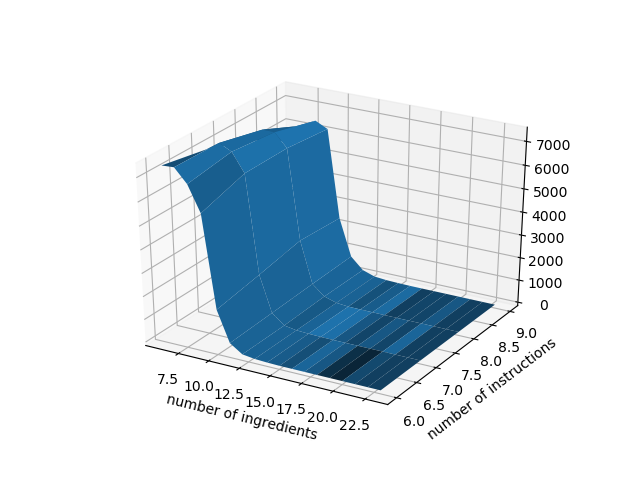

In [88]:
%matplotlib notebook

# Set up grid and test data
x = range(6,nx)
y = range(6,ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X.T, Y.T, ingr2instrCount[6:,6:])
ha.set_xlabel('number of ingredients')
ha.set_ylabel('number of instructions')

plt.show()